# Problem statement

### Storm Motors is an e-commerce company who act as mediators between parties interested in selling and buying pre-owned cars.

### Storm Motors wishes to develop an algorithm to predict the price of the cars based on various attributes associated with the car.

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
cars_data=pd.read_csv('cars_sampled.csv' )

In [4]:
cars=cars_data.copy()
cars

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,3/4/2016 15:48,Suche_VW_T5_Multivan,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,3/4/2016 0:00,29690,5/4/2016 15:16
49997,27/03/2016 14:55,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,27/03/2016 0:00,50181,7/4/2016 11:45
49998,14/03/2016 18:51,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,14/03/2016 0:00,86956,25/03/2016 6:17
49999,15/03/2016 18:06,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN,15/03/2016 0:00,65232,6/4/2016 17:15


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [6]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [7]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [8]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [9]:
col=['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars=cars.drop(columns=col, axis=1)

In [10]:
cars.drop_duplicates(keep='first',inplace=True)

In [11]:
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

In [12]:
yearwise_count=cars['yearOfRegistration'].value_counts().sort_index()
yearwise_count

1000     6
1255     1
1500     2
1910    14
1928     1
        ..
7500     1
7800     1
8500     1
8888     2
9999     7
Name: yearOfRegistration, Length: 97, dtype: int64

In [13]:
sum(cars['yearOfRegistration'] > 2018)

26

In [14]:
sum(cars['yearOfRegistration'] < 1950)


38

<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

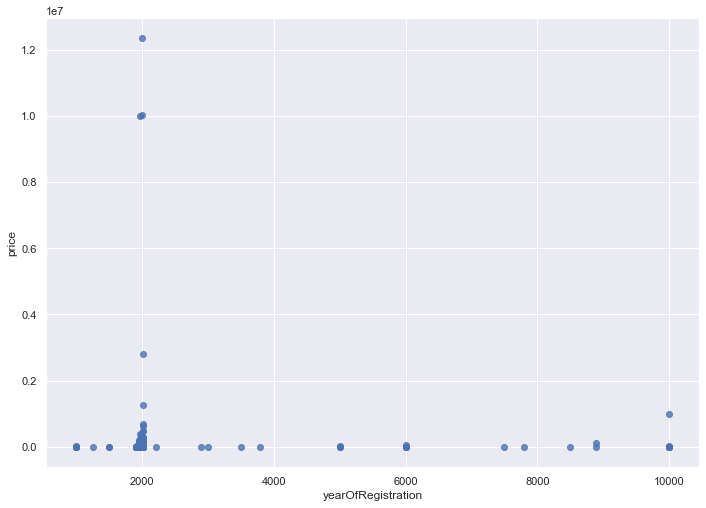

In [15]:
sns.regplot(x='yearOfRegistration', y='price', scatter=True, 
            fit_reg=False, data=cars)

In [16]:
price_count=cars['price'].value_counts().sort_index()
price_count

0           1415
1            172
2              1
3              1
5              4
            ... 
1250000        1
2795000        1
9999999        1
10010011       1
12345678       1
Name: price, Length: 2393, dtype: int64

C:\Users\tamilzh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

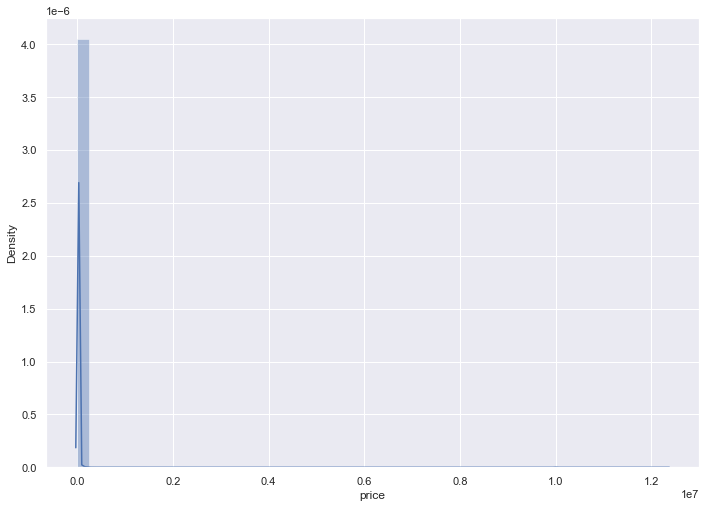

In [17]:
sns.distplot(cars['price'])

In [18]:
cars['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

<AxesSubplot:ylabel='price'>

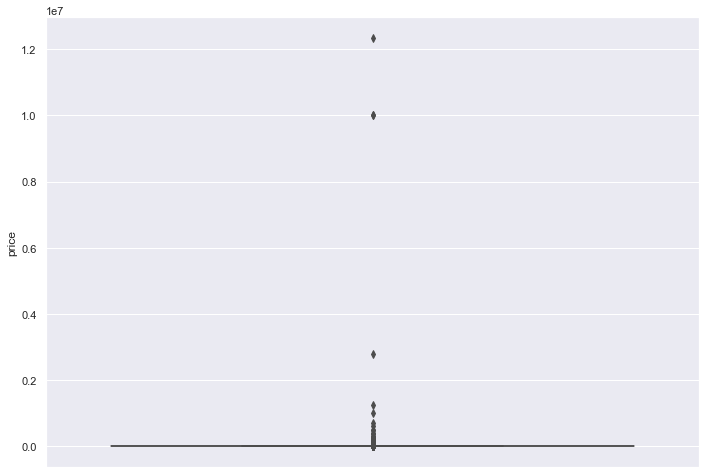

In [19]:
sns.boxplot(y=cars['price'])

In [20]:
sum(cars['price'] > 150000)

34

In [21]:
sum(cars['price'] < 100)


1748

In [22]:
power_count=cars['powerPS'].value_counts().sort_index()
power_count

0        5533
1           3
2           2
3           2
4           4
         ... 
15033       1
16011       1
16312       1
19211       1
19312       1
Name: powerPS, Length: 460, dtype: int64

C:\Users\tamilzh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='powerPS', ylabel='Density'>

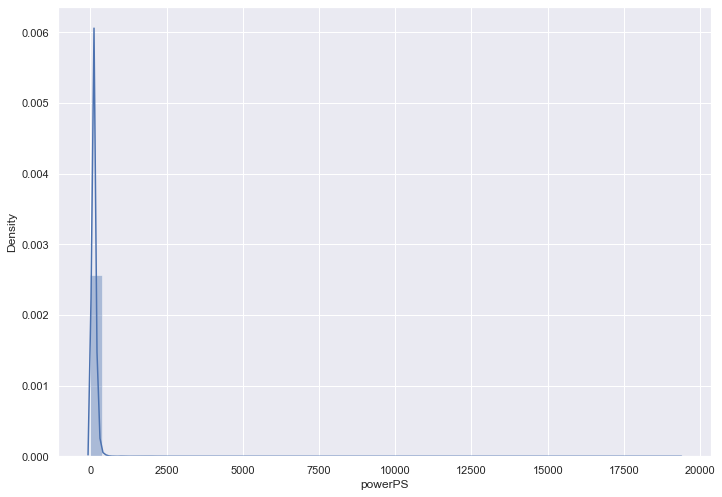

In [23]:
sns.distplot(cars['powerPS'])

In [24]:
cars['powerPS'].describe()

count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

<AxesSubplot:ylabel='powerPS'>

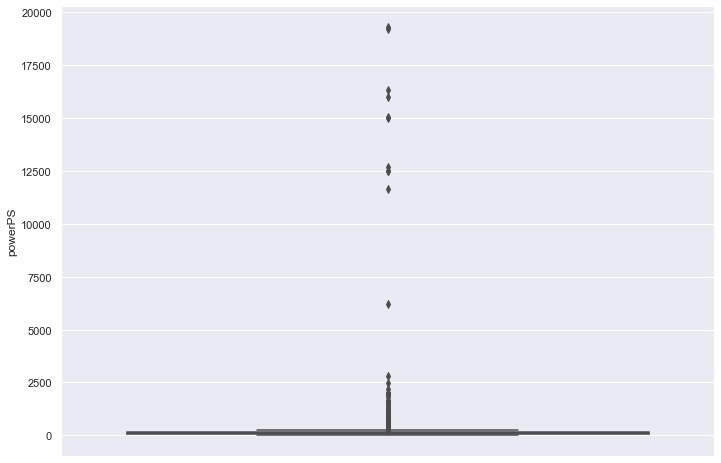

In [25]:
sns.boxplot(y=cars['powerPS'])

<AxesSubplot:xlabel='powerPS', ylabel='price'>

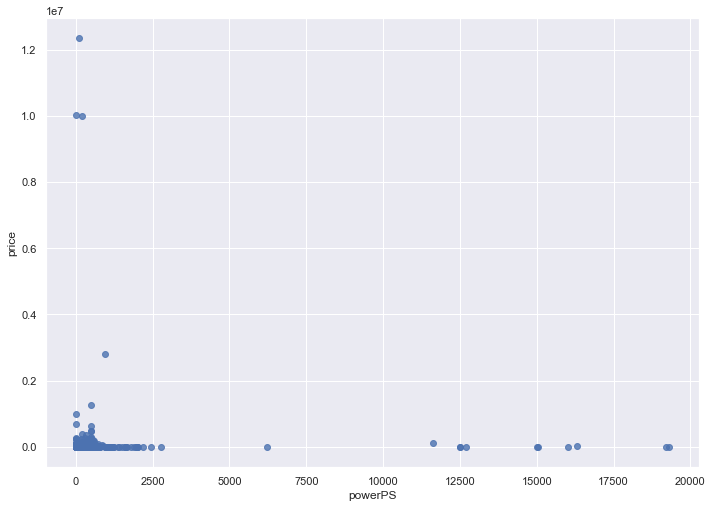

In [26]:
sns.regplot(x='powerPS', y='price', scatter=True, 
            fit_reg=False, data=cars)

In [27]:
sum(cars['powerPS'] > 500)

115

In [28]:
sum(cars['powerPS'] < 10)

5565

In [29]:
# Working range- 10 and 500
# Working range- 100 and 150000
# Working range- 1950 and 2018

In [30]:
# Working range of data
cars = cars[
        (cars.yearOfRegistration <= 2018) 
      & (cars.yearOfRegistration >= 1950) 
      & (cars.price >= 100) 
      & (cars.price <= 150000) 
      & (cars.powerPS >= 10) 
      & (cars.powerPS <= 500)]

In [31]:
# Combining yearOfRegistration and monthOfRegistration

cars['monthOfRegistration']/=12

# Creating new varible Age by adding yearOfRegistration and monthOfRegistration
cars['Age']=(2018-cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age']=round(cars['Age'],2)
cars['Age'].describe()

count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

In [32]:
cars=cars.drop(columns=['yearOfRegistration','monthOfRegistration'], axis=1)

In [33]:
cars

,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
0,private,offer,4450,test,limousine,manual,150,3er,150000,diesel,bmw,NaN,15.250
1,private,offer,13299,control,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
2,private,offer,3200,test,bus,manual,101,touran,150000,diesel,volkswagen,NaN,15.920
3,private,offer,4500,control,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
4,private,offer,18750,test,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,private,offer,10900,test,limousine,manual,231,x_reihe,150000,petrol,bmw,no,14.670
49992,private,offer,790,test,limousine,manual,82,astra,150000,diesel,opel,no,20.750
49993,private,offer,830,test,small car,manual,60,clio,125000,petrol,renault,no,19.670
49995,private,offer,2290,test,station wagon,manual,101,astra,150000,petrol,opel,no,17.250


C:\Users\tamilzh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

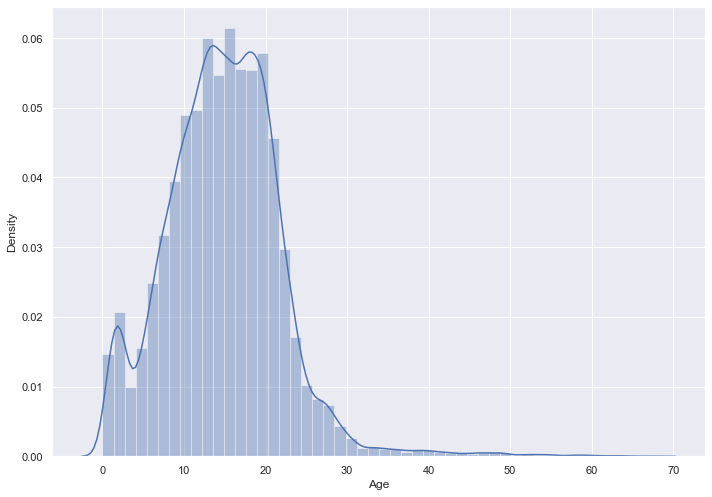

In [34]:
# Age
sns.distplot(cars['Age'])

<AxesSubplot:ylabel='Age'>

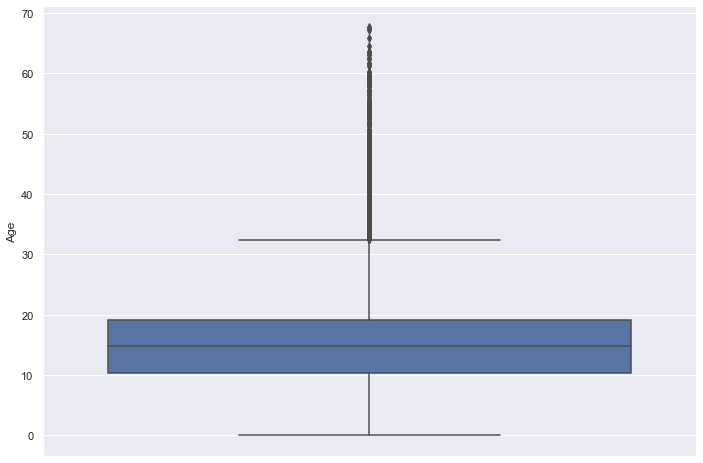

In [35]:
sns.boxplot(y=cars['Age'])

C:\Users\tamilzh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

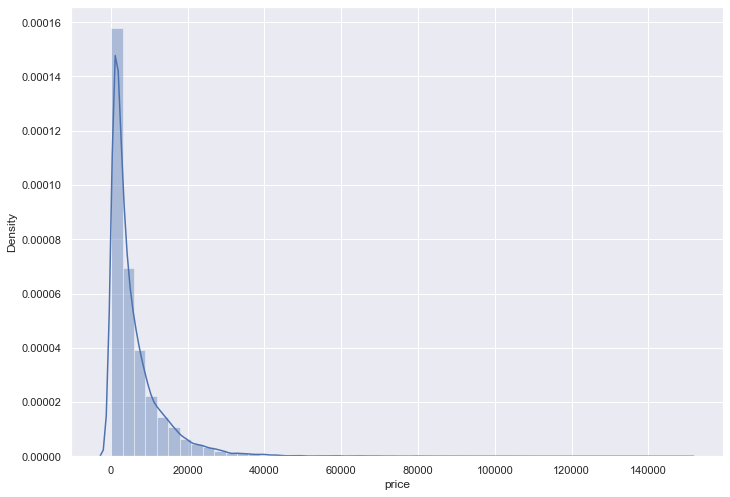

In [36]:
sns.distplot(cars['price'])

<AxesSubplot:ylabel='price'>

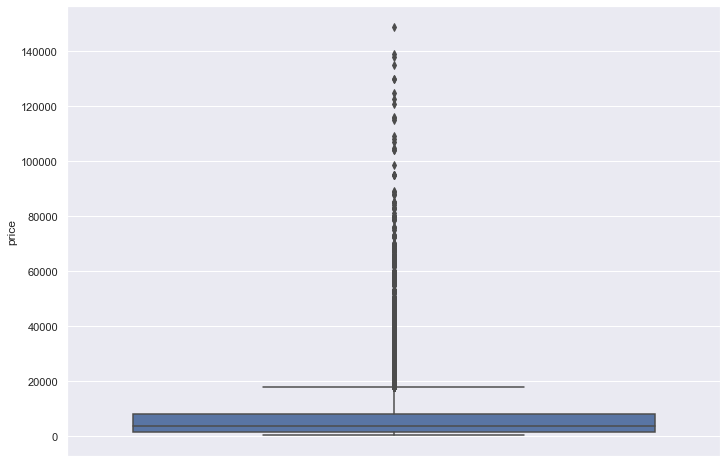

In [37]:
sns.boxplot(y=cars['price'])

C:\Users\tamilzh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='powerPS', ylabel='Density'>

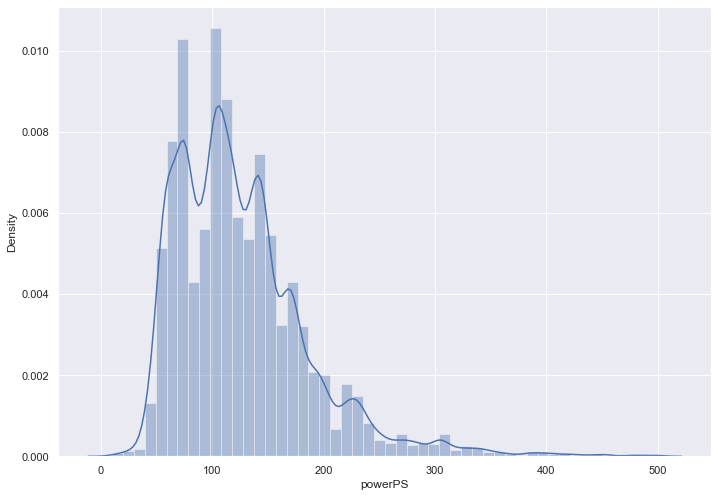

In [38]:
sns.distplot(cars['powerPS'])

<AxesSubplot:ylabel='price'>

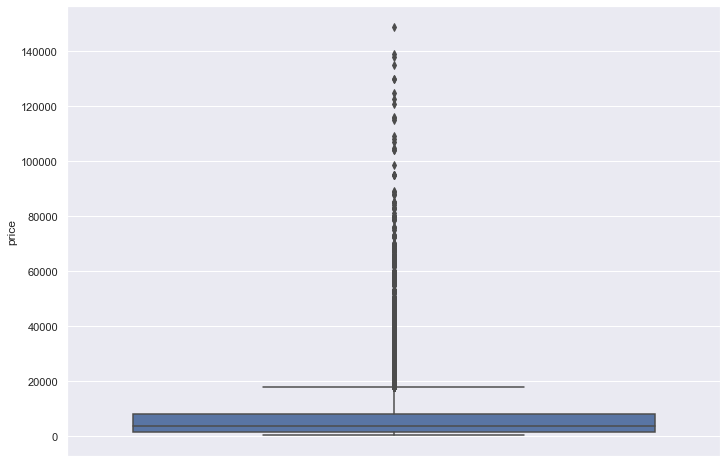

In [39]:
sns.boxplot(y=cars['price'])

<AxesSubplot:xlabel='Age', ylabel='price'>

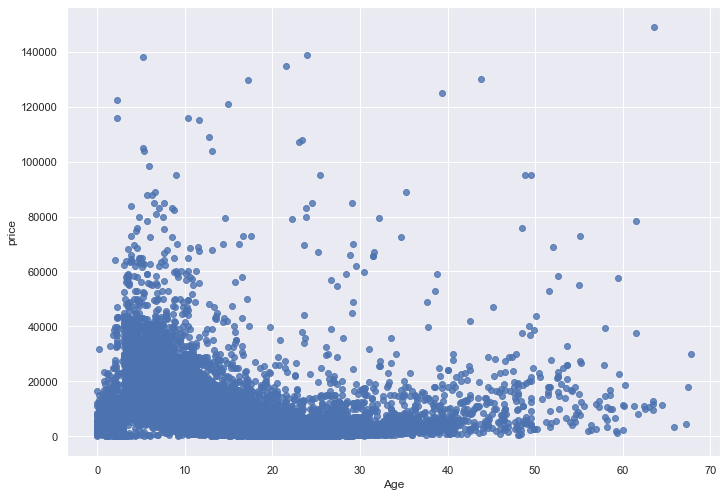

In [40]:
# Age vs price
sns.regplot(x='Age', y='price', scatter=True, 
            fit_reg=False, data=cars)

<AxesSubplot:xlabel='powerPS', ylabel='price'>

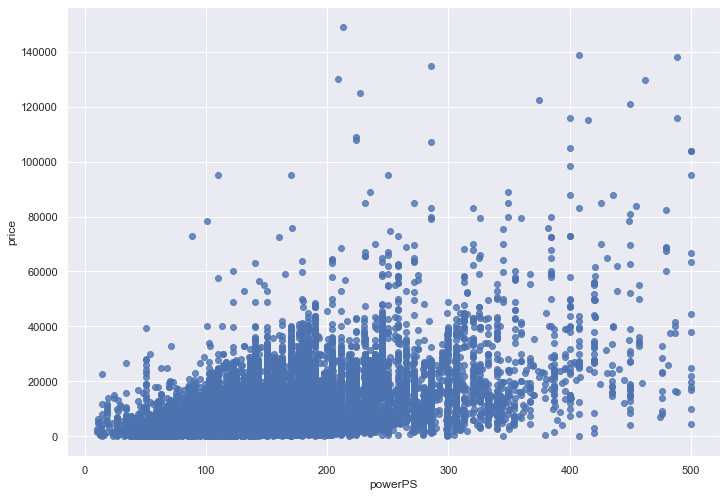

In [41]:
# powerPS vs price
sns.regplot(x='powerPS', y='price', scatter=True, 
            fit_reg=False, data=cars)

In [42]:
cars['seller'].value_counts()

private       42771
commercial        1
Name: seller, dtype: int64

In [44]:
pd.crosstab(cars['seller'],columns='count',normalize=True)

col_0,count
seller,
commercial,0.000
private,1.000


<AxesSubplot:xlabel='seller', ylabel='count'>

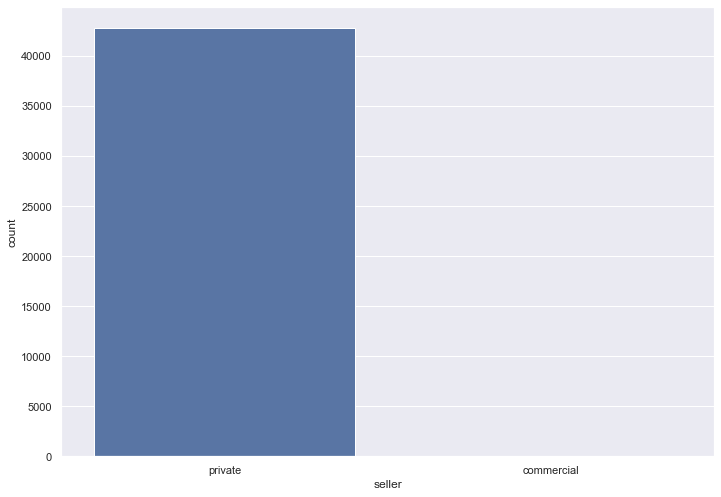

In [45]:
sns.countplot(x= 'seller',data=cars)

<AxesSubplot:xlabel='offerType', ylabel='count'>

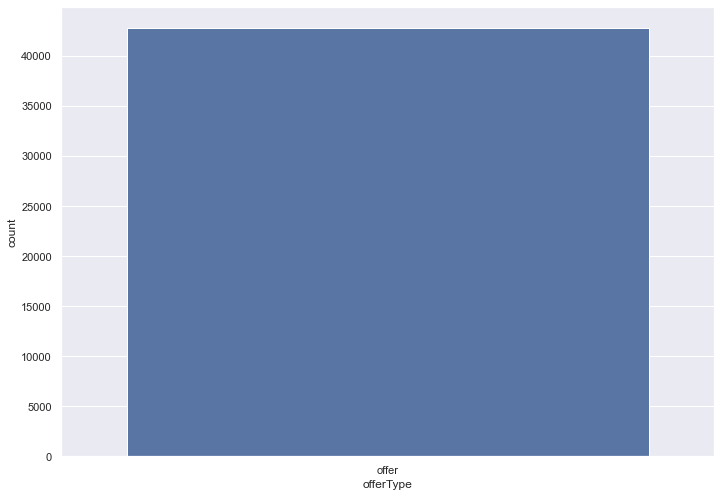

In [46]:
sns.countplot(x= 'offerType',data=cars)

In [47]:
pd.crosstab(cars['abtest'],columns='count',normalize=True)

col_0,count
abtest,
control,0.483
test,0.517


<AxesSubplot:xlabel='abtest', ylabel='count'>

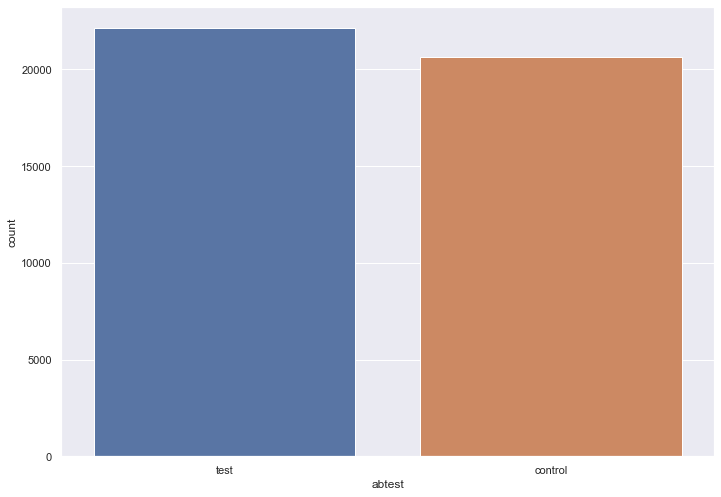

In [48]:
sns.countplot(x= 'abtest',data=cars)

<AxesSubplot:xlabel='abtest', ylabel='price'>

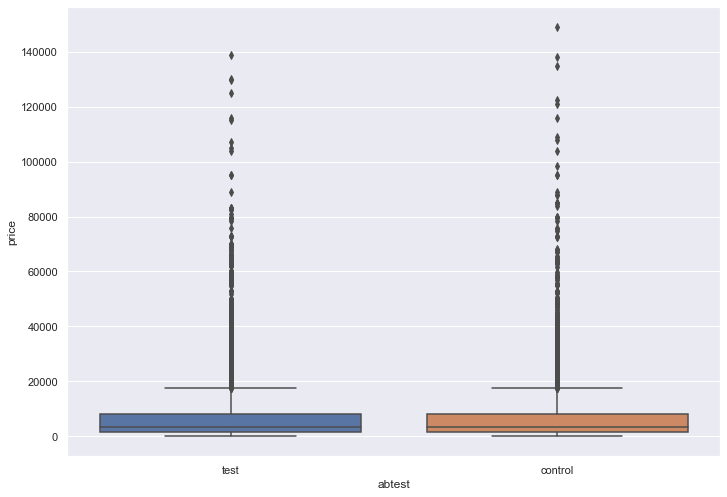

In [49]:
sns.boxplot(x= 'abtest',y='price',data=cars)
# For every price value there is almost 50-50 distribution
# Does not affect price => Insignificant

In [51]:
pd.crosstab(cars['vehicleType'],columns='count',normalize=True)

col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


<AxesSubplot:xlabel='vehicleType', ylabel='count'>

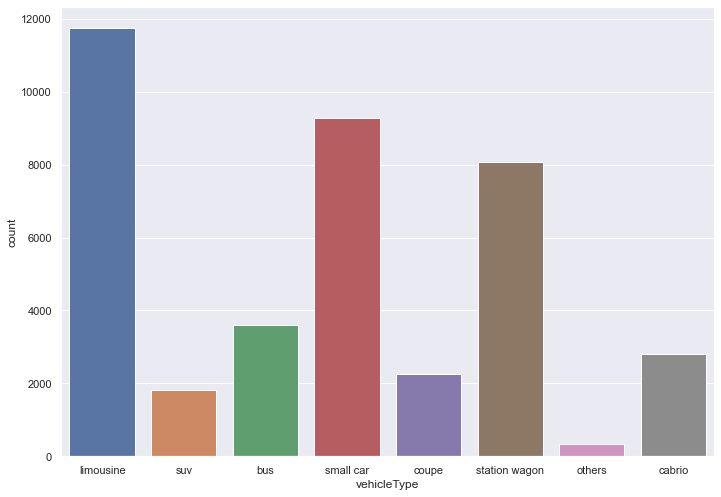

In [52]:
sns.countplot(x= 'vehicleType',data=cars)

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

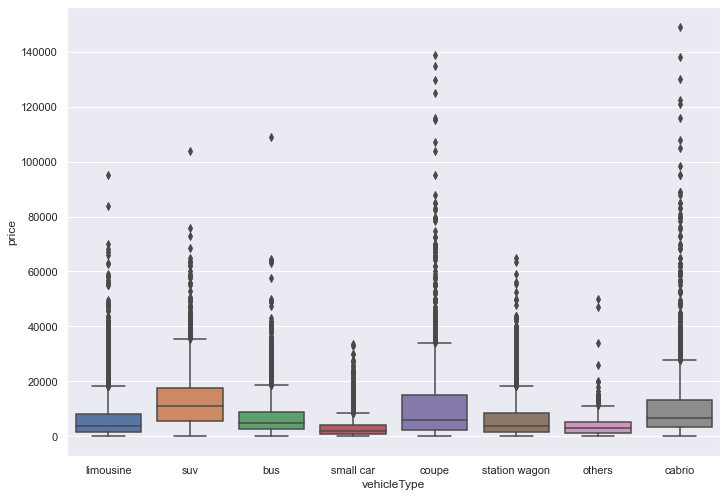

In [53]:
sns.boxplot(x= 'vehicleType',y='price',data=cars)

In [54]:
pd.crosstab(cars['gearbox'],columns='count',normalize=True)

col_0,count
gearbox,
automatic,0.224
manual,0.776


<AxesSubplot:xlabel='gearbox', ylabel='count'>

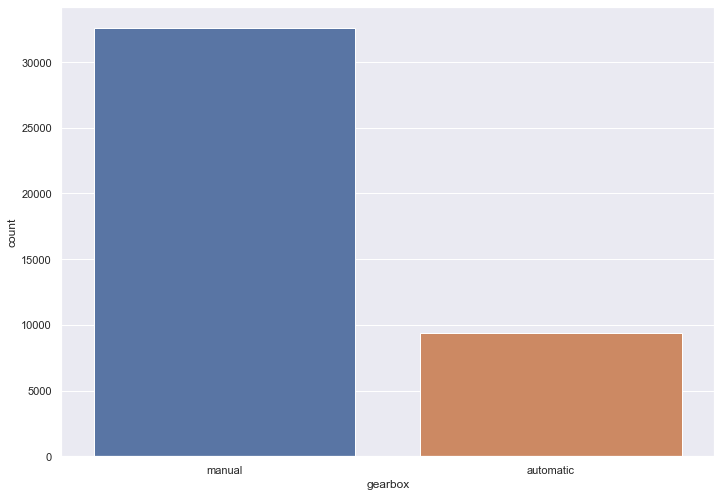

In [55]:
sns.countplot(x= 'gearbox',data=cars)

<AxesSubplot:xlabel='gearbox', ylabel='price'>

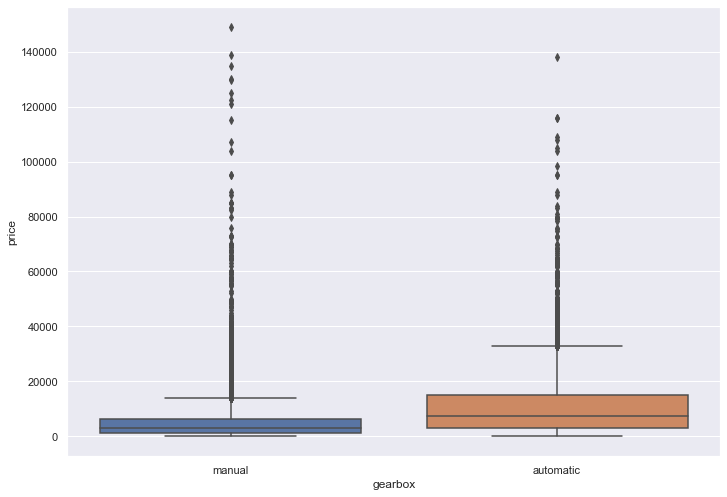

In [56]:
sns.boxplot(x= 'gearbox',y='price',data=cars)

In [57]:
pd.crosstab(cars['model'],columns='count',normalize=True)

col_0,count
model,
100,0.001
145,0.000
147,0.001
156,0.002
159,0.000
...,...
yaris,0.003
yeti,0.001
ypsilon,0.001


<AxesSubplot:xlabel='model', ylabel='count'>

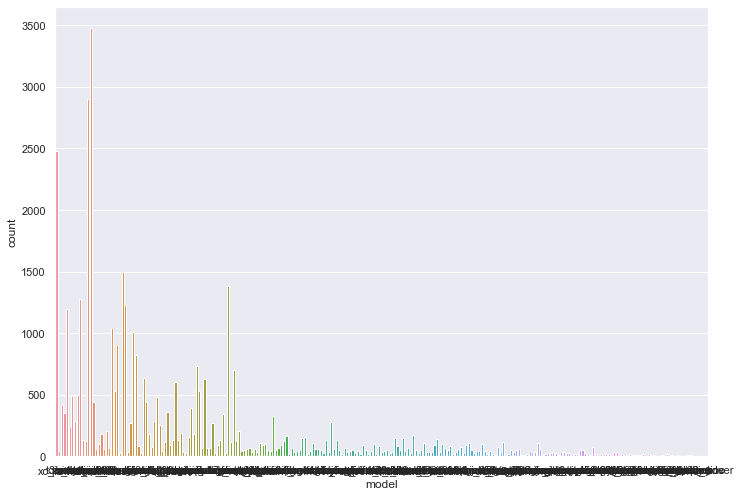

In [58]:
sns.countplot(x= 'model',data=cars)

<AxesSubplot:xlabel='model', ylabel='price'>

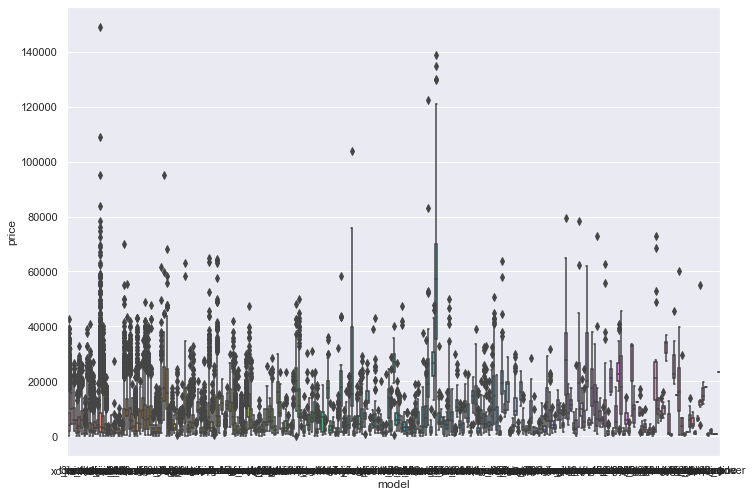

In [59]:
sns.boxplot(x= 'model',y='price',data=cars)

In [60]:
pd.crosstab(cars['kilometer'],columns='count',normalize=True)

col_0,count
kilometer,
5000,0.011
10000,0.005
20000,0.015
30000,0.017
40000,0.019
50000,0.022
60000,0.026
70000,0.028
80000,0.032


<AxesSubplot:xlabel='kilometer', ylabel='price'>

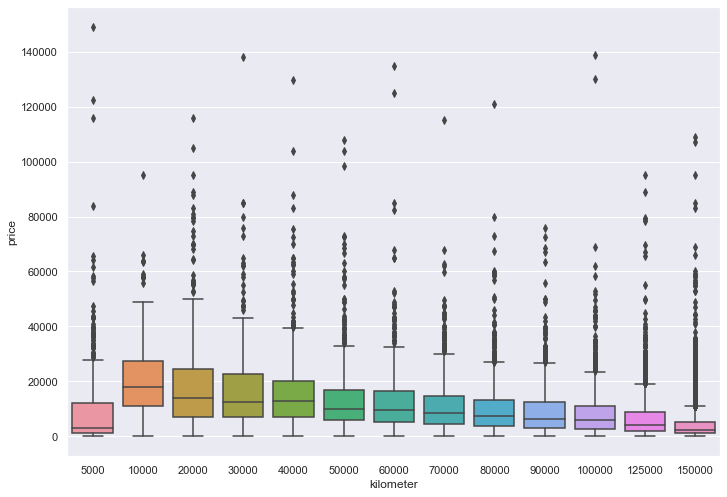

In [62]:
sns.boxplot(x= 'kilometer',y='price',data=cars)

In [63]:
cars['kilometer'].describe()

count    42772.000
mean    125815.253
std      39078.120
min       5000.000
25%     100000.000
50%     150000.000
75%     150000.000
max     150000.000
Name: kilometer, dtype: float64

C:\Users\tamilzh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='kilometer'>

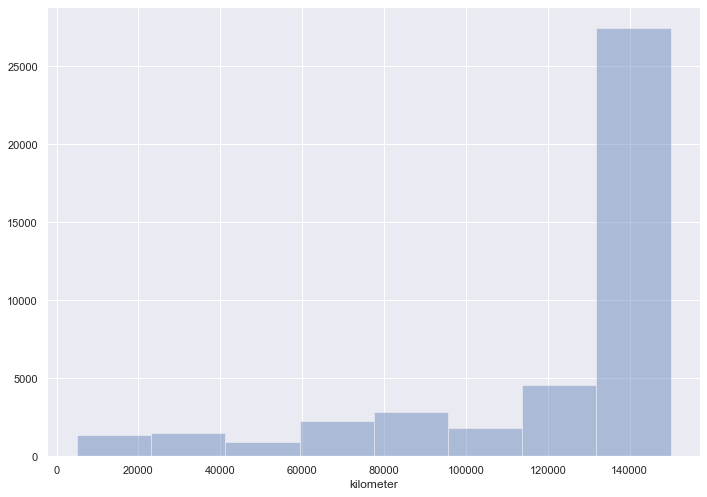

In [64]:
sns.distplot(cars['kilometer'],bins=8 ,kde=False)

<AxesSubplot:xlabel='kilometer', ylabel='price'>

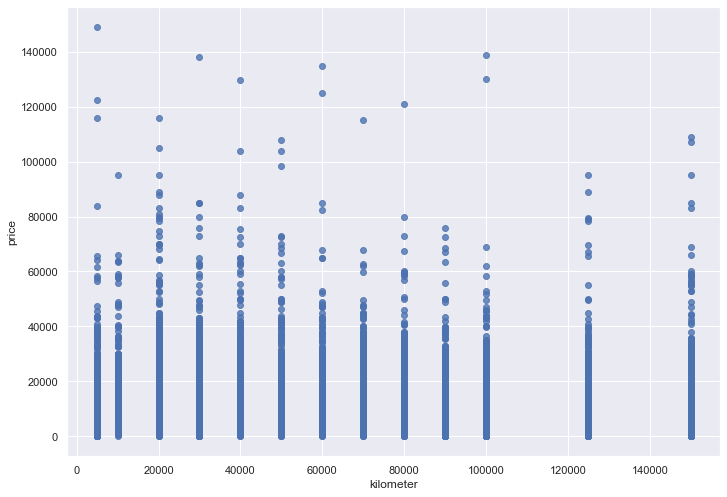

In [65]:
sns.regplot(x='kilometer', y='price', scatter=True, 
            fit_reg=False, data=cars)

In [66]:
pd.crosstab(cars['fuelType'],columns='count',normalize=True)

col_0,count
fuelType,
cng,0.002
diesel,0.320
electro,0.000
hybrid,0.001
lpg,0.017
other,0.000
petrol,0.660


<AxesSubplot:xlabel='fuelType', ylabel='count'>

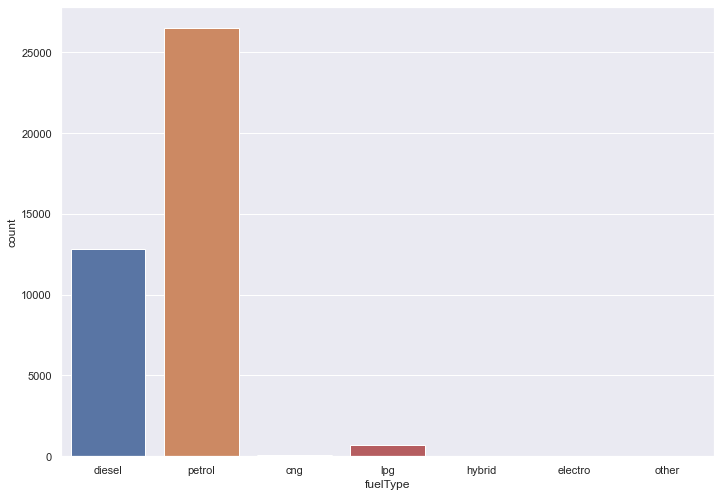

In [67]:
sns.countplot(x= 'fuelType',data=cars)

<AxesSubplot:xlabel='fuelType', ylabel='price'>

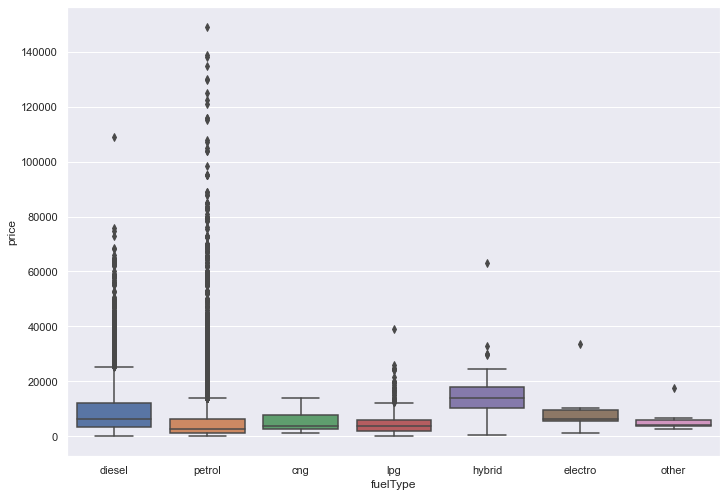

In [68]:
sns.boxplot(x= 'fuelType',y='price',data=cars)

In [69]:
pd.crosstab(cars['brand'],columns='count',normalize=True)

col_0,count
brand,
alfa_romeo,0.006
audi,0.093
bmw,0.114
chevrolet,0.005
chrysler,0.004
citroen,0.014
dacia,0.003
daewoo,0.001
daihatsu,0.002


<AxesSubplot:xlabel='brand', ylabel='count'>

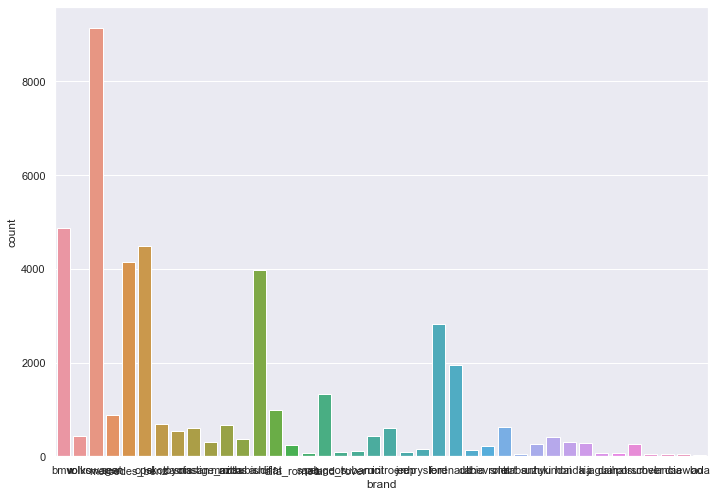

In [70]:
sns.countplot(x= 'brand',data=cars)

<AxesSubplot:xlabel='brand', ylabel='price'>

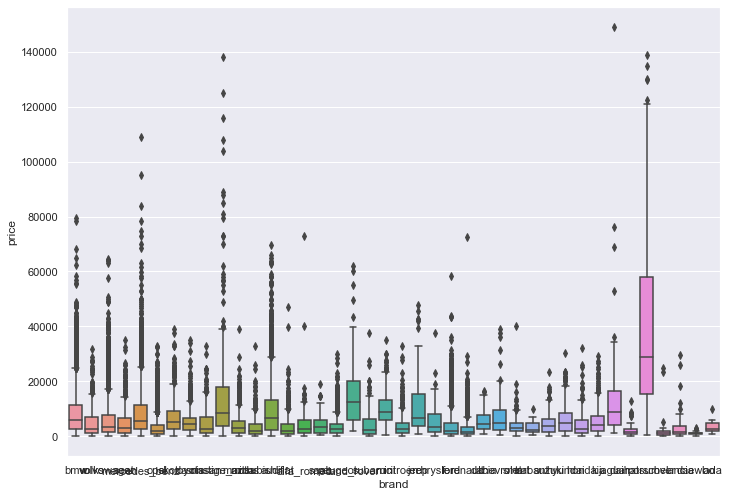

In [71]:
sns.boxplot(x= 'brand',y='price',data=cars)

In [72]:
pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)

col_0,count
notRepairedDamage,
no,0.891
yes,0.109


<AxesSubplot:xlabel='notRepairedDamage', ylabel='count'>

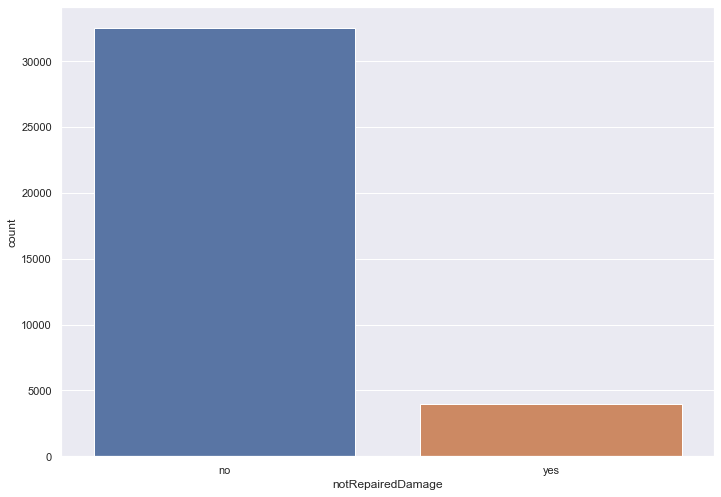

In [73]:
sns.countplot(x= 'notRepairedDamage',data=cars)

<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

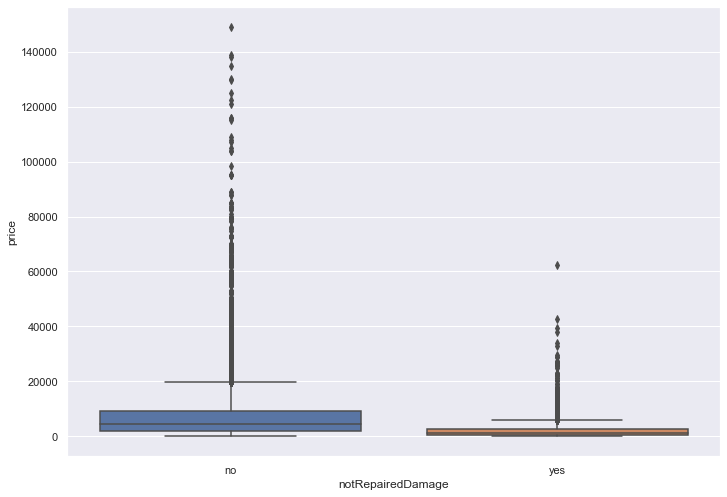

In [74]:
sns.boxplot(x= 'notRepairedDamage',y='price',data=cars)

In [75]:
col=['seller','offerType','abtest']
cars=cars.drop(columns=col, axis=1)
cars_copy=cars.copy()

In [76]:
cars_select1=cars.select_dtypes(exclude=[object])
correlation=cars_select1.corr()
correlation

,price,powerPS,kilometer,Age
price,1.000,0.575,-0.440,-0.336
powerPS,0.575,1.000,-0.016,-0.151
kilometer,-0.440,-0.016,1.000,0.292
Age,-0.336,-0.151,0.292,1.000


In [80]:
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

# Model building - Linear Regression, Random Forest algorithm

### building a Linear Regression and Random Forest model on two sets of data.
1. Data obtained by omitting rows with any missing value
2. Data obtained by imputing the missing values 

In [81]:
# OMITTING MISSING VALUES

In [82]:
cars_omit=cars.dropna(axis=0)

In [83]:
cars_omit=pd.get_dummies(cars_omit,drop_first=True) 

In [85]:
# MODEL BUILDING WITH OMITTED DATA

In [86]:
# Separating input and output features
x1 = cars_omit.drop(['price'], axis='columns', inplace=False)
y1 = cars_omit['price']

In [87]:
# Plotting the variable price
prices = pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

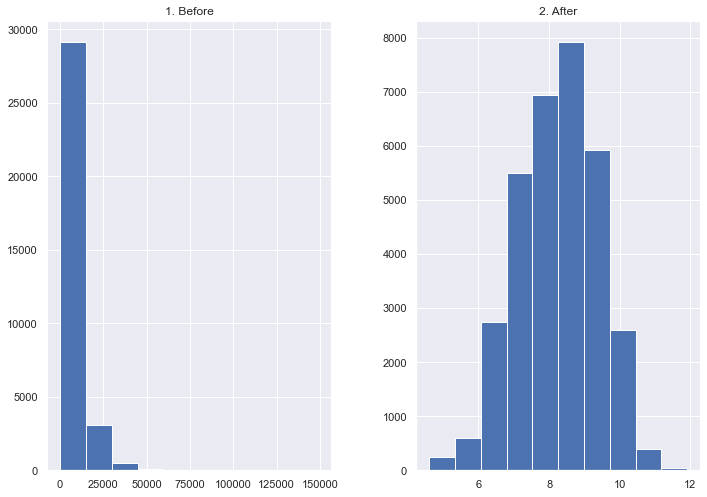

In [88]:
prices.hist()

In [89]:
# Transforming price as a logarithmic value
y1 = np.log(y1)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


In [91]:
"""
We are making a base model by using test data mean value
This is to set a benchmark and to compare with our regression model
"""

# finding the mean for test data value
base_pred = np.mean(y_test)
print(base_pred)

8.249615787653337


In [116]:
# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test))
base_pred

array([8.24961579, 8.24961579, 8.24961579, ..., 8.24961579, 8.24961579,
       8.24961579])

In [93]:
# finding the RMSE
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))

In [94]:
print(base_root_mean_square_error)

1.1274483657478247


In [95]:
# LINEAR REGRESSION WITH OMITTED DATA

In [96]:
lgr=LinearRegression(fit_intercept=True)

In [97]:
model_lin1=lgr.fit(X_train,y_train)

In [98]:
cars_predictions_lin1 = lgr.predict(X_test)

In [99]:
# Computing MSE and RMSE
lin_mse1 = mean_squared_error(y_test, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.5455481266513836


In [101]:
# R squared value
r2_lin_test1=model_lin1.score(X_test,y_test)
r2_lin_train1=model_lin1.score(X_train,y_train)
print(r2_lin_test1,r2_lin_train1)

0.7658615091649247 0.7800936978183916


<AxesSubplot:ylabel='price'>

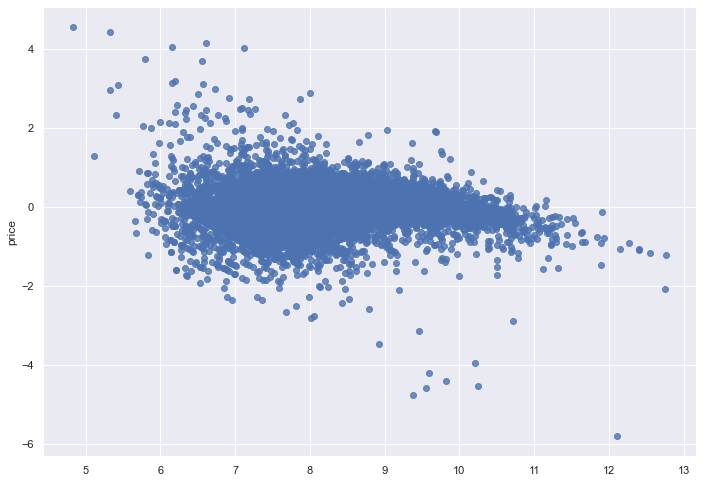

In [102]:
# Regression diagnostics- Residual plot analysis
residuals1=y_test-cars_predictions_lin1
sns.regplot(x=cars_predictions_lin1, y=residuals1, scatter=True, 
            fit_reg=False)

In [103]:
residuals1.describe()

count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

In [104]:
# RANDOM FOREST WITH OMITTED DATA

In [105]:
# Model parameters
rf = RandomForestRegressor(n_estimators = 100,max_features='auto',
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)


In [106]:
model_rf1=rf.fit(X_train,y_train)

In [107]:
cars_predictions_rf1 = rf.predict(X_test)

In [108]:
# Computing MSE and RMSE
rf_mse1 = mean_squared_error(y_test, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

0.4360736289370223


In [109]:
# R squared value
r2_rf_test1=model_rf1.score(X_test,y_test)
r2_rf_train1=model_rf1.score(X_train,y_train)
print(r2_rf_test1,r2_rf_train1)  

0.8504018147750623 0.9202494705146291


In [110]:
# MODEL BUILDING WITH IMPUTED DATA

In [111]:
cars_imputed = cars.apply(lambda x:x.fillna(x.median()) \
                  if x.dtype=='float' else \
                  x.fillna(x.value_counts().index[0]))
cars_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [112]:
cars_imputed=pd.get_dummies(cars_imputed,drop_first=True) 

In [113]:
x2 = cars_imputed.drop(['price'], axis='columns', inplace=False)
y2 = cars_imputed['price']


(array([3.8595e+04, 3.4440e+03, 5.1800e+02, 1.0900e+02, 5.7000e+01,
        2.6000e+01, 7.0000e+00, 7.0000e+00, 5.0000e+00, 4.0000e+00]),
 array([1.0000e+02, 1.4990e+04, 2.9880e+04, 4.4770e+04, 5.9660e+04,
        7.4550e+04, 8.9440e+04, 1.0433e+05, 1.1922e+05, 1.3411e+05,
        1.4900e+05]),
 <BarContainer object of 10 artists>)

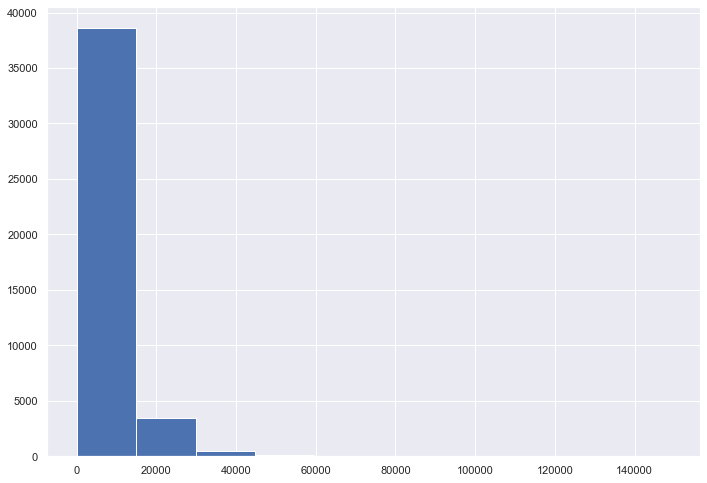

In [120]:
prices = pd.DataFrame({"1. Before":y2, "2. After":np.log(y2)})
plt.hist(x = prices['1. Before'])

(array([ 529., 1240., 4265., 7745., 9089., 9666., 6900., 2845.,  437.,
          56.]),
 array([ 4.60517019,  5.33582333,  6.06647647,  6.79712961,  7.52778275,
         8.25843589,  8.98908903,  9.71974217, 10.45039531, 11.18104845,
        11.91170158]),
 <BarContainer object of 10 artists>)

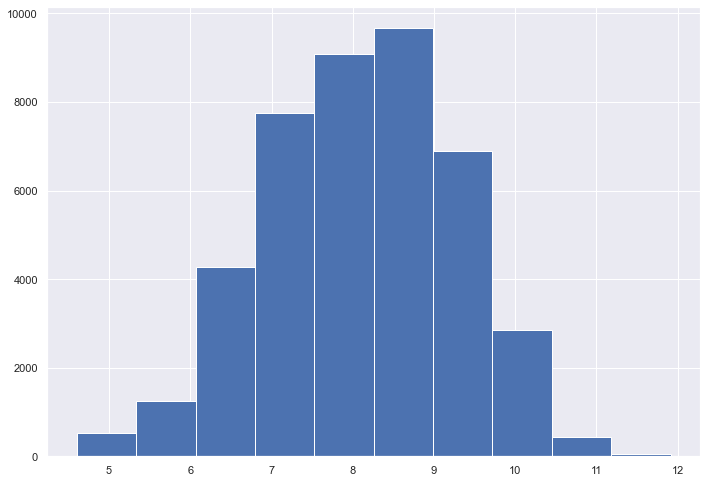

In [119]:
plt.hist(x = prices['2. After'])

In [121]:
y2 = np.log(y2)

In [122]:
# Splitting data into test and train
X_train1, X_test1, y_train1, y_test1 = train_test_split(x2, y2, test_size=0.3, random_state = 3)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(29940, 303) (12832, 303) (29940,) (12832,)


In [123]:
# BASELINE MODEL FOR IMPUTED DATA

In [124]:
base_pred = np.mean(y_test1)
print(base_pred)

8.068391740519193


In [125]:
base_pred = np.repeat(base_pred, len(y_test1))

In [126]:
base_root_mean_square_error_imputed = np.sqrt(mean_squared_error(y_test1, base_pred))
                               
print(base_root_mean_square_error_imputed)

1.1884349112889792


In [127]:
# LINEAR REGRESSION WITH IMPUTED DATA

In [128]:
lgr2=LinearRegression(fit_intercept=True)


In [129]:
model_lin2=lgr2.fit(X_train1,y_train1)

In [130]:
cars_predictions_lin2 = lgr2.predict(X_test1)

In [131]:
lin_mse2 = mean_squared_error(y_test1, cars_predictions_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
print(lin_rmse2)


0.6483956449231311


In [132]:
r2_lin_test2=model_lin2.score(X_test1,y_test1)
r2_lin_train2=model_lin2.score(X_train1,y_train1)
print(r2_lin_test2,r2_lin_train2)


0.7023339008631171 0.7071658736894363


In [133]:
# RANDOM FOREST WITH IMPUTED DATA

In [134]:

rf2 = RandomForestRegressor(n_estimators = 100,max_features='auto',
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)

In [135]:
model_rf2=rf2.fit(X_train1,y_train1)

In [136]:
cars_predictions_rf2 = rf2.predict(X_test1)

In [137]:
rf_mse2 = mean_squared_error(y_test1, cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
print(rf_rmse2)

0.494313994408829


In [138]:
r2_rf_test2=model_rf2.score(X_test1,y_test1)
r2_rf_train2=model_rf2.score(X_train1,y_train1)
print(r2_rf_test2,r2_rf_train2)                            


0.8269964521311131 0.9024289431669166


In [139]:
print("Metrics for models built from data where missing values were omitted")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train1)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test1)
print("R squared value for train from Random Forest=  %s"% r2_rf_train1)
print("R squared value for test from Random Forest=  %s"% r2_rf_test1)
print("Base RMSE of model built from data where missing values were omitted= %s"%base_root_mean_square_error)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse1)
print("RMSE value for test from Random Forest=  %s"% rf_rmse1)

Metrics for models built from data where missing values were omitted
R squared value for train from Linear Regression=  0.7800936978183916
R squared value for test from Linear Regression=  0.7658615091649247
R squared value for train from Random Forest=  0.9202494705146291
R squared value for test from Random Forest=  0.8504018147750623
Base RMSE of model built from data where missing values were omitted= 1.1274483657478247
RMSE value for test from Linear Regression=  0.5455481266513836
RMSE value for test from Random Forest=  0.4360736289370223


In [140]:
print("Metrics for models built from data where missing values were imputed")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train2)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test2)
print("R squared value for train from Random Forest=  %s"% r2_rf_train2)
print("R squared value for test from Random Forest=  %s"% r2_rf_test2)
print("Base RMSE of model built from data where missing values were imputed= %s"%base_root_mean_square_error_imputed)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse2)
print("RMSE value for test from Random Forest=  %s"% rf_rmse2)


Metrics for models built from data where missing values were imputed
R squared value for train from Linear Regression=  0.7071658736894363
R squared value for test from Linear Regression=  0.7023339008631171
R squared value for train from Random Forest=  0.9024289431669166
R squared value for test from Random Forest=  0.8269964521311131
Base RMSE of model built from data where missing values were imputed= 1.1884349112889792
RMSE value for test from Linear Regression=  0.6483956449231311
RMSE value for test from Random Forest=  0.494313994408829


# Findings or Insights


### Random forest model is performing well than the Linear Regression model in both omitted and imputed dataset in predicting the optimal price of the car for the e-commerce company Storm Motors